# Machine Learning - Classification Revisited & Clustering

- One of the useful things you might notice about Sklearn is how standardised the interface is (it is generally a bit better than other python modules eg Pandas)

- A consequence is applying a new classifier or clustering method often follows the same pattern as one you know, you just replace the name of the method you want to use

- However, it is crucial to be aware of function requirements and main inputs before implementing. 

For this week, it is good to have a look at the following functions whenever you need; 

#### Related to Ensemble Methods

- [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- [RandomForestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- [BaggingClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html)

- [HistGradientBoostingClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)

#### Related to Clustering

- [K-means clustering](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)

- [Silhouette score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html)

## Classification continued - Ensemble approach

Last time we talked about both decision trees and KNN models for doing classification problems. We noted that they are both relatively simple models (deliberately introduced for this reason). This time we want to show some other regression models that stretch more towards the state-of-the-art.

First we need to import all of the modules we are going to use. Notice that we will also grab the ensemble and cluster sub-modules of Scikit Learn as the main new elements for this notebook.

In [ ]:
# Import essential libraries for data science and machine learning
import numpy as np
import pandas as pd

# Import the main Scikit-Learn library for machine learning
import sklearn as skl

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import specific modules from Scikit-Learn for various ML tasks
import sklearn.tree as tree       # Decision tree algorithms
import sklearn.ensemble as ens    # Ensemble methods (e.g., random forests)
import sklearn.cluster as clus    # Clustering algorithms
import sklearn.preprocessing as prepr  # Data preprocessing tools
import sklearn.metrics as metrics      # Model performance evaluation

First let's return to the synthetic data set we used before, `synth` in week 7. 

- This time we can read in both train and test csv files, and split them up into X and y train/test splits using the same pattern of variable names we used in the last notebook.

- We can also make a quick scatter plot to look at our training data again. 

In [ ]:
# reading the training and testing simulated data 
train_data = pd.read_csv('synth.tr.csv')
test_data = pd.read_csv('synth.te.csv')

# Creating the train and test based on features and response separation as new subsets
X_train = train_data[['xs','ys']]
y_train = train_data['yc']
X_test = test_data[['xs','ys']]
y_test = test_data['yc']

# Creating the scatterplot of the variables xs and ys, also colored based on yc class
sns.scatterplot(data=train_data, x='xs', y='ys', hue='yc')
plt.title('Scatter plot - coloured by class')
plt.show()

Next we could fit a number of our classifiers to the training data, we can compare a decision tree with a gradient boosted tree, and a random forest (so, the two types of ensemble models we discussed). 

Each time;
>- we are going to fit our model using the training data, 
>- apply it to predict classes for our test data, 
>- and use those predictions to compare to the real classes to produce some scores for our various methods.

Notice how each of the methods is very similar to implement in code - all we really change is the setup of the classifier model in question:

In [ ]:
# Initialize a Decision Tree classifier
dt_class = tree.DecisionTreeClassifier()         # Create a decision tree classifier instance
dt_class.fit(X_train, y_train)                   # Train the model on the training data
y_predict = dt_class.predict(X_test)             # Predict labels for the test data

# Evaluate and print metrics for Decision Tree classifier
# Balanced accuracy
print('DT Balanced accuracy: ', skl.metrics.balanced_accuracy_score(y_test, y_predict))  
# F1 score
print('DT F1 score: ', skl.metrics.f1_score(y_true=y_test, y_pred=y_predict)) 

# Initialize a Random Forest classifier with a set number of trees
# Random Forest with 10 estimators (trees)
rf_class = ens.RandomForestClassifier(n_estimators=10) 
# Train the model on the training data
rf_class.fit(X_train, y_train)  
# Predict labels for the test data
y_predict = rf_class.predict(X_test)                         

# Evaluate and print metrics for Random Forest classifier
# Balanced accuracy
print('RF Balanced accuracy: ', skl.metrics.balanced_accuracy_score(y_test, y_predict))  
# F1 score
print('RF F1 score: ', skl.metrics.f1_score(y_true=y_test, y_pred=y_predict)) 

# Initialize a Bagging classifier with a set number of iterations
# Bagging with 10 estimators (trees)
bagging_class = ens.BaggingClassifier(n_estimators=10)
# Train the model on the training data
bagging_class.fit(X_train, y_train)   
# Predict labels for the test data
y_predict = bagging_class.predict(X_test)                         

# Evaluate and print metrics for Gradient Boosting classifier
# Balanced accuracy
print('Bagging Balanced accuracy: ', skl.metrics.balanced_accuracy_score(y_test, y_predict))  
# F1 score
print('Bagging F1 score: ', skl.metrics.f1_score(y_true=y_test, y_pred=y_predict))  

# Initialize a Gradient Boosting classifier with a set number of iterations
# Set up GBT classifier with 100 iterations
gbt_class = ens.HistGradientBoostingClassifier(max_iter=100) 
# Train the model on the training data
gbt_class.fit(X_train, y_train)    
# Predict labels for the test data
y_predict = gbt_class.predict(X_test)                         

# Evaluate and print metrics for Gradient Boosting classifier
# Balanced accuracy
print('GBT Balanced accuracy: ', skl.metrics.balanced_accuracy_score(y_test, y_predict))  
# F1 score
print('GBT F1 score: ', skl.metrics.f1_score(y_true=y_test, y_pred=y_predict))  

If you run and re-run the above code cell you will notice that the decision trees, random forest and bagging score changes every time. This is due to the random forest being made of decision trees trained on random subsets of our training data, and so that split is slightly different each time.

- To avoid such issues, especially in the next assignment, we need to make sure that, inside of our function implementations, `random_state` argument is defined and fixed. It mainly controls the randomness of the estimator. 
- By default, we have `random_state = None` so we need to choose some number in it. 
- Did you remember the number 42 from the last week for that purpose ?

**Warning: To get reproducible results, make sure that you run the following code chunk first!**

In [ ]:
random_state = 42

### Explore fitted Random forest visually

For the illustrative purposes, given code below focuses on only 4 fitted models within the random forest model with `max_depth=1`, no need to worry about the details of given code below, it is just for the visual illustration!

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize a Random Forest classifier with a set number of trees
rf_class = ens.RandomForestClassifier(n_estimators=10, max_depth = 1, random_state = random_state) # Random Forest with 10 estimators (trees)
rf_class.fit(X_train, y_train)                               # Train the model on the training data
y_predict = rf_class.predict(X_test)                         # Predict labels for the test data

# Number of trees to visualize and grid layout
num_trees_to_plot = 4
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid layout

for i in range(num_trees_to_plot):
    row = i // 2  # Determine the row (0 or 1)
    col = i % 2   # Determine the column (0 or 1)
    plot_tree(
        rf_class.estimators_[i], 
        filled=True, 
        feature_names=X_train.columns, 
        rounded=True, 
        ax=axs[row, col]   # Assign each tree to its subplot position
    )
    axs[row, col].set_title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()


In [ ]:
# Initialize a Bagging classifier with a set number of iterations
# Bagging with 10 estimators (trees)
bagging_class = ens.BaggingClassifier(n_estimators = 10, random_state = random_state)
# Train the model on the training data
bagging_class.fit(X_train, y_train)   
# Predict labels for the test data
y_predict = bagging_class.predict(X_test)                         

# Evaluate and print metrics for Gradient Boosting classifier
# Balanced accuracy
print('Bagging Balanced accuracy: ', skl.metrics.balanced_accuracy_score(y_test, y_predict))  
# F1 score
print('Bagging F1 score: ', skl.metrics.f1_score(y_true=y_test, y_pred=y_predict))   

In [ ]:
# Initialize a Gradient Boosting classifier with a set number of iterations
# Set up GBT classifier with 100 iterations
gbt_class = ens.HistGradientBoostingClassifier(max_iter = 100, random_state = random_state) 
# Train the model on the training data
gbt_class.fit(X_train, y_train)    
# Predict labels for the test data
y_predict = gbt_class.predict(X_test)                         

# Evaluate and print metrics for Gradient Boosting classifier
# Balanced accuracy
print('GBT Balanced accuracy: ', skl.metrics.balanced_accuracy_score(y_test, y_predict))  
# F1 score
print('GBT F1 score: ', skl.metrics.f1_score(y_true=y_test, y_pred=y_predict))    

- Overall though you should generally notice that both ensemble methods tend to do better than the decision tree, and usually the gradient boosted tree does slightly better than the random forest.

- The last model we fitted was the boosting classifier, so we can have a look at what the classification looks like by making a plot of our training data and the classification of our test data:

In [ ]:
# Scatterplot of xs vs ys, coloured in green for the test data
sns.scatterplot(data = test_data, x = "xs", y = "ys", color = 'green')
plt.title("Scatter plot of test data")
plt.show()

# Scatterplot of xs vs ys, coloured based on predicted response on test data 
sns.scatterplot(data = test_data, x = "xs", y = "ys", hue = y_predict)
# Scatterplot of xs vs ys, coloured based on predicted response on training data with original yc values
sns.scatterplot(data = train_data, x = "xs", y = "ys", hue = 'yc', legend = False, marker='^')
plt.title("Scatter plot of test & train data")
plt.show()

---
---

## Clustering

Next we want to try out the K-Means clustering method on some data. To do this we will use the Penguins dataset - this has various measurements of different species of penguin. The dataset is built into the seaborn module as an example dataset, so we can load it in from there. 

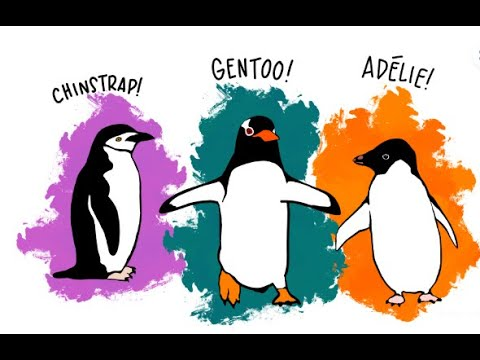

### Loading our data

First let's load in the data and get rid of any missing values by using the `dropna()` function from pandas to remove them:

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
print(penguins.head())

We can't view the entirety of this feature space as it is too high dimensional - but we can plot two of the columns together. We can also colour the points according to a third column (species in this case) to see how the groupings of data points look in this slice of our feature space.

In [ ]:
# Scatterplot for the pair of bill length vs bill depth, separated based on species
sns.scatterplot(data = penguins, x = "bill_length_mm", y = "bill_depth_mm", hue = 'species')
plt.title("Scatter plot of penguin data")
plt.show()

We can see broadly the three species look a bit like three clusters in this view. 

This prompts a question then - could we cluster using all of the columns except for 'species' into three clusters to see if we can see the three species coming out in the clusters that are found?

### First K-means fit

We need to supply two parameters to the K-Means clustering, 
    - firstly K, 
    - but also `n_init` which details how many times the algorithm starts from a different random start point to make sure it converges (we can pretty much always leave that as `auto` to let the algorithm automatically select how to do this).
- When we fit the clusters we might like to use all the data columns apart from the `species` column - but notice that some of them (island, sex) are categorical and so we can't immediately include them as they aren't numerical and we can't define a distance between points with them as they are. So for now we leave out those two columns in the following model fit.

Here is the code to make our clustering: 

In [ ]:
# Initiate the Kmeans algorithm with k=3 case
clusters = clus.KMeans(n_clusters=3, n_init="auto")
# Fitting the clustering using numerical variables only 
clus_pred = clusters.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])

# Prediction of cluster labels
print(clus_pred.labels_)
print("--------------------------------------")
# Calculated cluster centres based on model fit 
print(clus_pred.cluster_centers_)

***Important Note:**

As you can realise, when you rerun the above code, there are some changes again in the output. Again `random_state` plays a role inside of the `KMeans` function. Without setting `random_state = random_state`, you can get slightly different results, since random number generation for centroid initialization is changing in the default setting. Whenever we fixed that parameter to a specific number, we make that randomness deterministic again.

In [ ]:
# Initiate the Kmeans algorithm with k=3 case
clusters = clus.KMeans(n_clusters=3, n_init="auto", random_state = random_state)
# Fitting the clustering using numerical variables only 
clus_pred = clusters.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])

# Prediction of cluster labels
print(clus_pred.labels_)
print("--------------------------------------")
# Calculated cluster centres based on model fit 
print(clus_pred.cluster_centers_)

We can get both the cluster labels and the cluster centres (the two main outputs from the method) from the fitted model. Both are kept in variables with a trailing underscore `labels_` and `cluster_centers_`. The trailing underscore is a signal that these are internal to the method and not entirely meant to be used as output (but we can be cheeky and grab them as these are things we might want to use). The main output is gained from the `predict()` method of the clustering just like for classification methods - that predicts the cluster of an additional point.

We can plot our data again and this time use the cluster labels to colour the data points:

In [ ]:
# Scatterplot again by adding predicted labels, for the visualization focused on bill length and depth only again 
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = clus_pred.labels_, palette="pastel")
plt.title("Scatter plot of penguin data")
plt.show() 

### Adding categorical type variables into the model

As we discussed in the lecture there are two ways to shift a categorical variable into a numerical value. The first way is to assign an integer to each class within our categorical variable (so the column island has three possible values Torgersen, Biscoe, and Dream so these get converted to 0,1,2 in our new column.

The code for how to do this is below - first we convert the column to be of 'categorical' type in pandas, and then make a new column with the category codes (the numbered version of the categories):

In [ ]:
# Converting the island into categorical type
penguins["island"] = penguins["island"].astype('category')
# new column called island_no that contains numerical codes for each category in the 'island' column
penguins['island_no'] = penguins["island"].cat.codes

# Converting the sex into categorical type
penguins["sex"] = penguins["sex"].astype('category')
# new column called sex_no that contains numerical codes for each category in the 'sex' column
penguins['sex_no'] = penguins["sex"].cat.codes

print(penguins)

Once we have these new columns we may include them in our clustering calculation. 

Here are the same lines again to do this but now with the added columns with encoded categories passed into our `fit()` function:

In [ ]:
clusters = clus.KMeans(n_clusters=3, n_init="auto", random_state = random_state)

clus_pred = clusters.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", 
                                   "sex_no", "island_no"]])

# Prediction of cluster labels
print(clus_pred.labels_)
print("--------------------------------------")
# Calculated cluster centres based on model fit 
print(clus_pred.cluster_centers_)

And again we can plot up our data with this new clustering providing the colouring according to which cluster each point belongs to:

In [ ]:
# Scatterplot again by adding predicted labels, for the visualization focused on bill length and depth only again 
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue=clus_pred.labels_, palette="pastel")
plt.title("Scatter plot of penguin data")
plt.show()

### Importance of rescaling for the variables

One of the other issues we worried about for distance-based methods is that distances in different feature directions should be similar. So each feature should be re-scaled to make sure that they vary by about the same amount. 

- **Sklearn has a preprocessing sub-module which contains a function to normalise our data automatically.** 

Here we repeat the above clustering, but this time preprocess our data using the normalisation function first:

In [ ]:
# Initiate the model again with same parameters
clusters = clus.KMeans(n_clusters = 3, n_init = "auto", random_state = random_state)

# Consider first normalizing all the variables 
X_normalized = prepr.normalize(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", 
                                         "body_mass_g", "sex_no", "island_no"]], norm='l2')

# Now fit the K-means clustering again on the normalized variables
clus_pred = clusters.fit(X_normalized)

# Prediction of cluster labels
print(clus_pred.labels_)
print("--------------------------------------")
# Calculated cluster centres based on model fit 
print(clus_pred.cluster_centers_)

In [ ]:
# Scatterplot again by adding predicted labels, for the visualization focused on bill length and depth only again 
sns.scatterplot(data = penguins, x = "bill_length_mm", y = "bill_depth_mm", 
                hue = clus_pred.labels_, palette = "pastel")
plt.title("Scatter plot of penguin data")
plt.show()

### Evaluate the performance of the K-means

Lastly we talked about the way in which we might score our clustering using the silhouette measure, or looking at the average distance from points to their centre in each cluster.

The silhouette score is available in the metrics sub-module of Sklearn, at least needs two input parameters;
   - An array of pairwise distances between samples, or a feature array.
   - Predicted labels for each sample.

In [ ]:
metrics.silhouette_score(penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm", "body_mass_g", 
                                   "sex_no","island_no"]], clus_pred.labels_)

This gives us the overall silhouette score (Mean Silhouette Coefficient for all samples) for a given clustering allowing us to compare between different attempts at clustering a given datset. What about using this information for the selection of K ?

- Below we construct a loop over different values of K and repeat our clustering for each value, each time computing the two measures we have considered, silhouette and cumulative distance from points to centre in each cluster (note Sklearn uses cumulative distance rather than average - but it makes little difference in the way we use these).

Here is the code to construct these scores and make suitable plots:

In [ ]:
# Define a range of possible 'k' values (number of clusters) to test
kvals = np.arange(2, 10)  # Values of 'k' from 2 to 9
scores = []               # Empty list to store silhouette scores for each 'k'
distsq = []               # Empty list to store inertia (sum of squared distances) for each 'k'

# Loop over each value of 'k' to test different numbers of clusters
for k in kvals:
    # Initialize a KMeans model with the current 'k' clusters
    clusters = clus.KMeans(n_clusters=k, n_init="auto", random_state = random_state)  # n_init="auto" chooses best init method

    # Fit the KMeans model on the penguin data, selecting only specific features
    clus_pred = clusters.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", 
                                       "body_mass_g", "sex_no", "island_no"]])

    # Calculate the silhouette score, which measures how well the clusters are separated
    score = metrics.silhouette_score(penguins[["bill_length_mm", "bill_depth_mm", 
                                               "flipper_length_mm", "body_mass_g", 
                                               "sex_no", "island_no"]], clus_pred.labels_)
    print('silhouette score values:' , score)           # Print silhouette score for the current 'k'
    scores.append(score)    # Add the score to the scores list

    # Print and save the inertia value, which is the sum of squared distances to the nearest cluster center
    print('the sum of squared distances to the nearest cluster center:', clus_pred.inertia_)  
    distsq.append(clus_pred.inertia_)  # Add inertia to distsq list
    
    print('---------------------------------')


In [ ]:
# Plot silhouette scores against 'k' values
fig = plt.figure(1)             # Create a new figure
ax = fig.add_subplot(111)       # Add a subplot to the figure
ax.plot(kvals, scores)          # Plot silhouette scores for each 'k'
plt.xlim([0, 10])               # Set x-axis limits from 0 to 10
plt.ylim([0.4, 0.8])            # Set y-axis limits for better visualization
plt.title("Silhouette Scores against different k values") # Adding title toe the plot
plt.show()                      # Display the silhouette score plot

# Plot inertia (sum of squared distances) against 'k' values - Elbow Plot
fig = plt.figure(1)             # Create another figure for inertia plot
ax = fig.add_subplot(111)       # Add a subplot to the figure
ax.plot(kvals, distsq)          # Plot inertia values for each 'k'
plt.title("Elbow plot via different k values") # Adding title toe the plot
plt.show()                      # Display the inertia plot

- From these plots K=2 gives the best silhouette score and so would be selected, we are mainly interested in the largest value , as close as possible to 1!
- For the elbow plot there isn't a very clear elbow, but arguments could be made in favour of selecting K between 3 and 4 by inspection of the plot.


## Exercises

### Ensemble Models

1) Examine the dataset in `titanic.csv`. It contains data about travellers on the Titanic and whether or not they survived. This can be constructed as a classification problem 
 - try loading the data and splitting it into both training and test data sets 
 - you should use 25% of the data for the test dataset, note the classes we want to classify are contained in the column 'survived'.

2) Using both a Bagging and a Random Forest to predict the survival (the 'survived' column) of each passenger from the other data columns. Which method performs best?

### Clustering

3) Load up the `mpg.csv` dataset and discuss how many clusters we should optimally cluster it into, **make sure to normalise** the data before clustering it (use the columns of 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration').

Your comments here